# **Brent Oil Price Change Point Analysis**

In [1]:
# 📊 Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys

In [2]:
# 🛠️ Add the 'scripts' directory to the Python path for module imports
sys.path.append(os.path.abspath(os.path.join('..', 'scripts')))

In [3]:
# 🖥️ Set max rows and columns to display
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200)

In [4]:
# 📚 Assuming this class is defined in scripts/
from data_preprocessing import DataPreprocessor 

# 📏 Set figure size for visualizations
plt.figure(figsize=(12, 5))

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

In [5]:
# 📂 Set the local path for loading the dataset
file_path = '../data/BrentOilPrices.csv'
print("📥 Loading data from:", file_path)

📥 Loading data from: ../data/BrentOilPrices.csv


In [6]:
data= pd.read_csv(file_path)
print(data.head())

        Date  Price
0  20-May-87  18.63
1  21-May-87  18.45
2  22-May-87  18.55
3  25-May-87  18.60
4  26-May-87  18.63


In [7]:
print(data.tail(10))

              Date  Price
9001  Nov 01, 2022  95.12
9002  Nov 02, 2022  96.07
9003  Nov 03, 2022  95.29
9004  Nov 04, 2022  99.53
9005  Nov 07, 2022  99.87
9006  Nov 08, 2022  96.85
9007  Nov 09, 2022  93.05
9008  Nov 10, 2022  94.25
9009  Nov 11, 2022  96.37
9010  Nov 14, 2022  93.59


In [8]:
# ⚙️ Setup the data preprocessor class
processor = DataPreprocessor(file_path)

# 🚀 Load the data
try:
    oil_price_data = processor.load_data()
    print("✅ Data loaded successfully! Here's a preview:")
    print(oil_price_data.head())
except Exception as e:
    print("❌ An error occurred while loading the data:", e)

d:\KAIM\Brent-Oil-Price-Change-Point-Analysis\scripts\data_preprocessing.py:82: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  self.data["Date"] = pd.to_datetime(


✅ Data loaded successfully! Here's a preview:
        Date  Price
0 1987-05-20  18.63
1 1987-05-21  18.45
2 1987-05-22  18.55
3 1987-05-25  18.60
4 1987-05-26  18.63


In [9]:
oil_price_data.head(10)

,Date,Price
0,1987-05-20,18.63
1,1987-05-21,18.45
2,1987-05-22,18.55
3,1987-05-25,18.60
4,1987-05-26,18.63
5,1987-05-27,18.60
6,1987-05-28,18.60
7,1987-05-29,18.58
8,1987-06-01,18.65
9,1987-06-02,18.68


In [10]:
oil_price_data.tail(10)

,Date,Price
9001,2022-11-01,95.12
9002,2022-11-02,96.07
9003,2022-11-03,95.29
9004,2022-11-04,99.53
9005,2022-11-07,99.87
9006,2022-11-08,96.85
9007,2022-11-09,93.05
9008,2022-11-10,94.25
9009,2022-11-11,96.37
9010,2022-11-14,93.59


In [11]:
# 🚀 Inspect the data
processor.inspect(oil_price_data)
print("✅ Data inspected successfully!")

### 📏 **Dimensions (rows, columns):** (9011, 2)

### 📊 **Data Types:**

Date     datetime64[ns]
Price           float64
dtype: object

### ❓ **Missing Values:**

**No missing values found. ✅**

### 🔍 **Unique Values in Each Column:**

Date     9011
Price    5015
dtype: int64

### 🚨 **Number of Duplicate Rows: 0**

### 📈 **Summary Statistics for Numeric Columns:**

,Price
count,9011.000000
mean,48.420782
std,32.860110
min,9.100000
25%,19.050000
50%,38.570000
75%,70.090000
max,143.950000


### 🔗 **Correlation Matrix:**

,Date,Price
Date,1.000000,0.720816
Price,0.720816,1.000000


### 🚫 **Outlier Counts in Each Numeric Column:**

Series([], dtype: int64)

✅ Data inspected successfully!


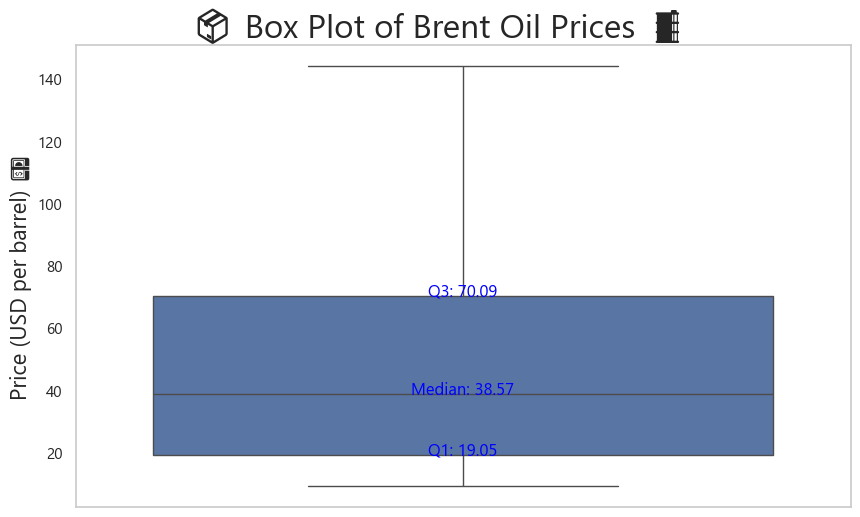

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams

# Set font to one that supports emojis
rcParams["font.family"] = "sans-serif"
rcParams["font.sans-serif"] = ["Segoe UI Emoji", "DejaVu Sans"]

plt.figure(figsize=(10, 6))

# Create the box plot
box_plot = sns.boxplot(data=oil_price_data, y="Price", color="#4C72B0")

# Add grid lines
plt.grid(axis="y")

# Add title and labels
plt.title("📦 Box Plot of Brent Oil Prices 🛢️", fontsize=24, fontweight='bold')
plt.ylabel("Price (USD per barrel) 💵", fontsize=16)

# Annotate the box plot with median and quartiles
median = oil_price_data["Price"].median()
q1 = oil_price_data["Price"].quantile(0.25)
q3 = oil_price_data["Price"].quantile(0.75)

# Add text annotations
plt.text(0, median, f'Median: {median:.2f}', horizontalalignment='center', color='blue', fontsize=12)
plt.text(0, q1, f'Q1: {q1:.2f}', horizontalalignment='center', color='blue', fontsize=12)
plt.text(0, q3, f'Q3: {q3:.2f}', horizontalalignment='center', color='blue', fontsize=12)

plt.show()

### **Exploratory Data Analysis**

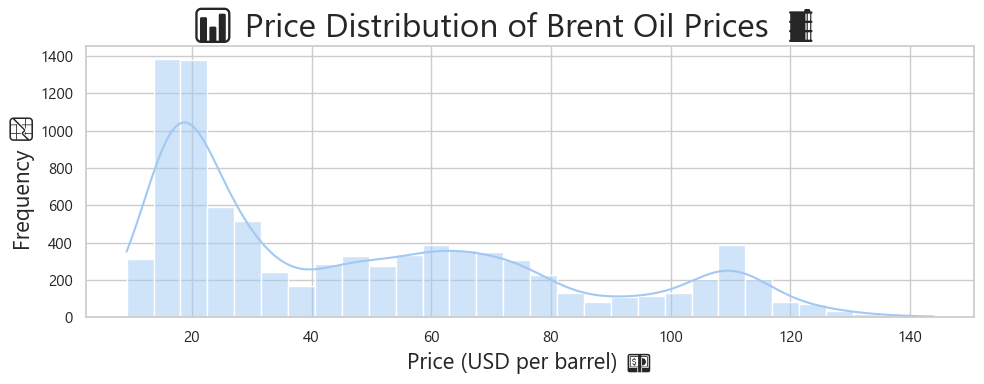

In [39]:
# Set the pastel color palette
sns.set_palette('pastel')

# Create the histogram with KDE
plt.figure(figsize=(10, 4))
sns.histplot(oil_price_data['Price'], bins=30, kde=True)

# Add title and labels with emojis
plt.title('📊 Price Distribution of Brent Oil Prices 🛢️', fontsize=24, fontweight='bold')
plt.xlabel('Price (USD per barrel) 💵', fontsize=16)
plt.ylabel('Frequency 📈', fontsize=16)

# Show the plot
plt.tight_layout()
plt.show()